<h1 style="color:red;">Week 3</h1>

<p style="font-size:18px;">
    <strong>This is an introductory Jupyter notebook on ROOT and basic physics cuts.</strong>
</p>

<h2 style="font-size:18px">What is ROOT?</h2>

<p style="font-size:16px;">
    ROOT is a powerful data analysis framework used in high-energy physics, designed for analyzing data from particle physics experiments. It provides tools for handling large datasets, performing statistical analysis, and visualizing results.
</p>

<p style="font-size:16px;">
    For our purpose, we use a python library called <code style="color:purple;">'uproot'</code>, which allows for the analysis of ROOT files without the need for a C++ ROOT installation.
</p>

<p style="font-size:16px;">
    For more information, please visit this site: 
    <a href="https://uproot.readthedocs.io/en/latest/basic.html#opening-a-file" style="color:darkblue;">
        Uproot Documentation
    </a>
</p>


In [1]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

In [2]:
file = uproot.open('./root_files/ZZTo4e.root')

In [3]:
print(file.keys())

['Events;1']


In [4]:
print(file['Events;1'].keys())

['run', 'luminosityBlock', 'event', 'PV_npvs', 'PV_x', 'PV_y', 'PV_z', 'nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge', 'Muon_pfRelIso03_all', 'Muon_pfRelIso04_all', 'Muon_tightId', 'Muon_softId', 'Muon_dxy', 'Muon_dxyErr', 'Muon_dz', 'Muon_dzErr', 'nElectron', 'Electron_pt', 'Electron_eta', 'Electron_phi', 'Electron_mass', 'Electron_charge', 'Electron_pfRelIso03_all', 'Electron_dxy', 'Electron_dxyErr', 'Electron_dz', 'Electron_dzErr']


In [5]:
print(file['Events;1'].keys(filter_name = 'Electron*'))

['Electron_pt', 'Electron_eta', 'Electron_phi', 'Electron_mass', 'Electron_charge', 'Electron_pfRelIso03_all', 'Electron_dxy', 'Electron_dxyErr', 'Electron_dz', 'Electron_dzErr']


In [6]:
# Define `tree` to denote the first and only tree in this file
tree = file['Events;1']

In [7]:
# print out Electron pT for each event as an array. Note the number of events at the bottom of the printout
print(tree['Electron_pt'].array())

[[23.2, 36.2, 13.6, 38.1], [48, 31.4, ..., 36.3], ..., [13.9, 58.3, 80, 20.7]]


In [8]:
Electron_pt=tree['Electron_pt'].array()
Electron_pt

<Array [[23.2, 36.2, 13.6, 38.1], ..., [...]] type='72853 * var * float32'>

<h1 style="color:red;">Let's look at a basic cut using numpy to remove unwanted values</h1>


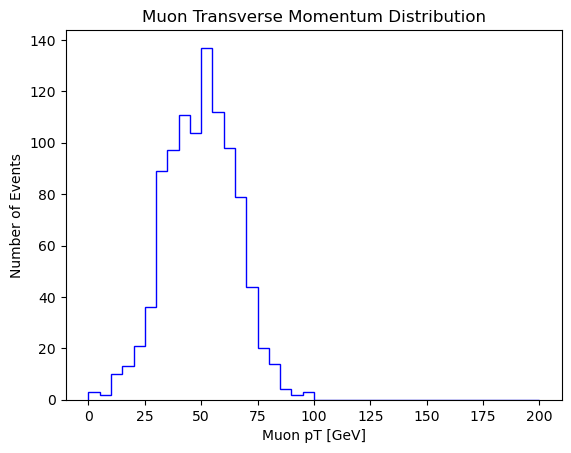

In [9]:
import numpy as np 
import matplotlib.pyplot as plt

# Generating synthetic data for muon transverse momentum (muon_pt)
np.random.seed(12)
muon_pt = np.random.normal(50, 15, 1000)  # generate 1000 numbers with mean 50 and standard deviation 15


# Plot the Muon transverse momentum
plt.hist(muon_pt, bins = 40, range = (0, 200), histtype = 'step', color = 'blue')
plt.xlabel('Muon pT [GeV]')
plt.ylabel('Number of Events')
plt.title('Muon Transverse Momentum Distribution')
plt.show()

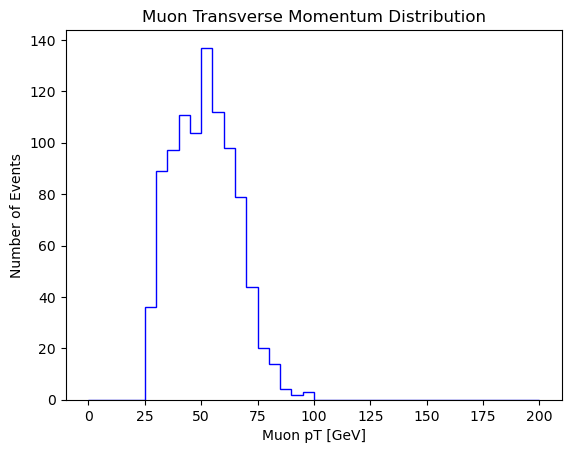

In [10]:
muon_pt_mask = muon_pt > 25
# Apply a cut to remove some muon values 
muon_pt_filtered = muon_pt[muon_pt_mask]

# Replot after the cut
plt.hist(muon_pt_filtered, bins=40, range=(0, 200), histtype='step', color='blue')
plt.xlabel('Muon pT [GeV]')
plt.ylabel('Number of Events')
plt.title('Muon Transverse Momentum Distribution')
plt.show()

<h1 style="color:red;">Let's apply some cuts to the root file from earlier </h1>

In [11]:
# Remind ourself of the available columns
print(tree.keys())

['run', 'luminosityBlock', 'event', 'PV_npvs', 'PV_x', 'PV_y', 'PV_z', 'nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge', 'Muon_pfRelIso03_all', 'Muon_pfRelIso04_all', 'Muon_tightId', 'Muon_softId', 'Muon_dxy', 'Muon_dxyErr', 'Muon_dz', 'Muon_dzErr', 'nElectron', 'Electron_pt', 'Electron_eta', 'Electron_phi', 'Electron_mass', 'Electron_charge', 'Electron_pfRelIso03_all', 'Electron_dxy', 'Electron_dxyErr', 'Electron_dz', 'Electron_dzErr']


In [12]:
# Access the kinematics of the file
muon_pt = tree['Muon_pt'].array()
muon_eta = tree['Muon_eta'].array()
muon_phi = tree['Muon_phi'].array()
muon_count = tree['nMuon'].array()
electron_count = tree['nElectron'].array()

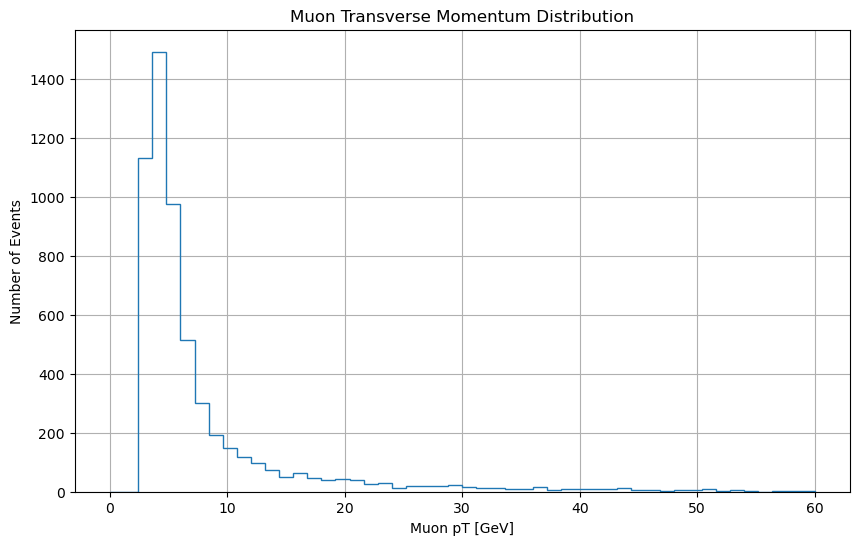

In [13]:
# And plot these actual muon_pt values

muon_pt_flat = ak.flatten(muon_pt)

plt.figure(figsize = (10, 6))
plt.hist(muon_pt_flat, bins = 50, range = (0, 60), histtype = 'step')
plt.xlabel('Muon pT [GeV]')
plt.ylabel('Number of Events')
plt.title('Muon Transverse Momentum Distribution')
plt.grid(True)
plt.show()

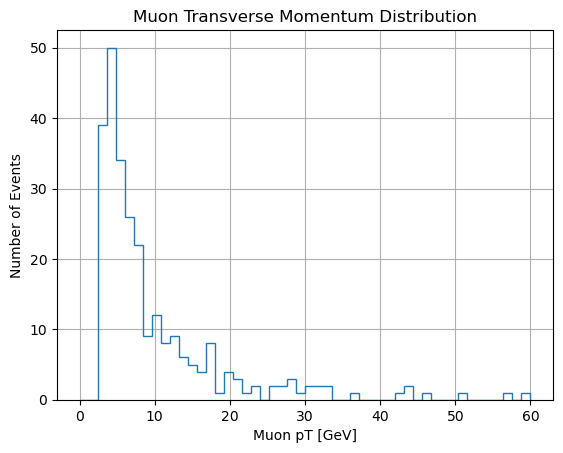

In [14]:
# Let's say that I want to look at only those events that have at least 4 muons in the final state
muon_count_mask = (muon_count >= 4)

# Now I want to look at the momentum of the muon after this cut
filtered_muon = muon_pt[muon_count_mask]
        
filtered_muon_pt = ak.flatten(filtered_muon)        
# Plotting the Muon transverse momentum
plt.hist(filtered_muon_pt, bins = 50, range = (0, 60), histtype = 'step')
plt.xlabel('Muon pT [GeV]')
plt.ylabel('Number of Events')
plt.title('Muon Transverse Momentum Distribution')
plt.grid(True)
plt.show()

<h1 style="color:green;">Homework #3 for CMS: In a new Jupyter notebook, make plots of muon transverse momentum distribution and electron transverse momentum distribution when the final state contains both 2 electrons and 2 muons. Use the same ROOT file as in this notebook. Upload the notebook to Brightspace.</h1>
